In [1]:
import pandas as pd 
import numpy as np 

pseudo-codigo no overleaf
entender e explicar o pseudo codigo
validar simulacao


estado dos carros:
cp(j), cd(j), cb(j), cf(j), ct(j)
posicao - direcao - botoes - andares - tempo

M=10 pisos, N=2 carros

estados dos pisos:
ff(i)[], fb(i), ftc(i)
fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa

    
    Ts=3600 %para 1 hora
    ftc = inicializar
    M = 10
    N = 2
    lambda_value = 0.005
    
    for ts=1:Ts
        for i=1:M (para cada andar)
            if ftc(i) <= ts then
                ftc(i) = ftc(i) + exp(1/lambda);
                d = gera_dest();
                c = atribui_car(d)
                ff(i) <-- [ftc ,ta ,d ,c ]
                fb(d) = 1; %explicar  
            end if
        endfor-m
        
        for j=1:N (para cada elevador)
            if cp(j) mod 30 <> 0 then
                if cd(j) = 1 then
                    cp(j) = cp(j) + 1;
                if cd(j) = -1 then
                    cp(j) = cp(j) -1;
                else ERRO1;
            end if
                   
            if cp(j) mod 30 = 0 then
                f = quoc(cp(j) mod 30);
                buscar_passageiros(f, cf(j), cd(j)) --> explicar?
                descarregar_passageiros(f, cb(j), cd(j))
                atualizar_direcao()
                mover()
            end if
                
        endfor-N
    end-for-ts
    
    
Lembrete: toda vez que retira passageiros da s filas, salva os dados daquele passageiro [ftc, ta] num arquivo, que poder ser em disco ou em memória, para calcular média e variância do tempo de espera.

In [2]:
#carro
#variaveis do carro:  (CPj, CDj, CBj, CGj, CTj) car position, 
#car direction, clicked button, car get passengers waiting, temporizer
class Car:
    def __init__(self, name, car_position = 0, passengers = [], car_direction = 0, pressed_buttons = [], car_passengers_waiting = set(), temporizer = 0):
        self.car_position = car_position
        self.car_direction = car_direction
        self.pressed_buttons = pressed_buttons #destinos dos passageiros
        self.car_passengers_waiting = car_passengers_waiting #andares que passageiros entrarão
        self.temporizer = temporizer
        self.name = name
        self.passengers = passengers
        
    def car_action(self, floor):
        if (floor.number in self.pressed_buttons):
            #retira os  passageiros
            remove = 0
            for p in self.passengers:
                print("Teste saida: {} para {}".format(p.destination, floor.number))
                if (p.destination == floor.number):
                    print("passageiro sai")
                    remove +=1
                    
            for i in range(remove):
                for p in self.passengers:
                    if (p.destination == floor.number):
                        if (floor.number in self.pressed_buttons):
                            self.pressed_buttons.remove(floor.number)
                        #atualiza o attendance
                        p.attendance = self.temporizer
                        #salva nos passageiros atendidos
                        passengers_served.append(p)
                        #remove do elevador
                        self.passengers.remove(p)
                
        
        #print("{} in {}".format(floor.number, self.car_passengers_waiting))
        self.update_direction()
                    
        if (floor.number in self.car_passengers_waiting):
            #print("Andar {}".format(floor.number))
            #pega os  passageiros
            passenger_still_waiting = False
            validation = len(floor.passengers_queue)
            count = 0
            aux_leave = []
            for p in floor.passengers_queue:
                #if (p.selected_car == self.name):
                if (p.destination > floor.number and (self.car_direction == 1 or self.car_direction == 0)):
                    #entra
                    #adiciona no elevador
                    self.passengers.append(p)
                    #remove do andar
                    #floor.passengers_queue.remove(p)                        
                    aux_leave.append(p)
                    #print("passageiro entra")
                    self.pressed_buttons.append(p.destination)
                    p.boarding = self.temporizer

                elif (p.destination < floor.number and (self.car_direction == -1 or self.car_direction == 0)):
                    #entra
                    #adiciona no elevador
                    self.passengers.append(p)
                    #remove do andar
                    #floor.passengers_queue.remove(p)  
                    aux_leave.append(p)
                    #print("passageiro entra")
                    self.pressed_buttons.append(p.destination)
                    p.boarding = self.temporizer
                else:
                    #print("ERROR2")
                    passenger_still_waiting = True
                    print("destination {} - andar {} - direcao {}".format(p.destination, floor.number, self.car_direction))
                    #print()
                count += 1
                
            for leave in aux_leave:
                floor.passengers_queue.remove(leave)    
            
            if (not passenger_still_waiting and count < validation):
                print("***********")
                print(count, validation)
                print("***********")
            
            if (passenger_still_waiting):
                self.car_passengers_waiting.add(floor.number)
            else:
                while(True):
                    if (floor.number in self.car_passengers_waiting):
                        self.car_passengers_waiting.remove(floor.number)
                    else:
                        break
        
        
    def update_direction(self):
        # atualiza direcao
        if (self.car_direction == 0):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #print("car {} no action".format(self.name))
                    pass
                else:
                    solicited_floor = list(self.car_passengers_waiting)[0]
                    current_floor = int(self.car_position/height_floor)
                    if(solicited_floor > current_floor or current_floor == 0):
                        self.car_direction = 1
                        #print("car {} - going up".format(self.name))
                    elif(solicited_floor < current_floor or current_floor == (floor_number - 1)):
                        self.car_direction = -1
                        #print("car {} - going down".format(self.name))
            else:
                solicited_floor = self.pressed_buttons[0]
                current_floor = int(self.car_position/height_floor)
                if(solicited_floor > current_floor):
                    self.car_direction = 1
                    #print("car {} - going up".format(self.name))
                elif(solicited_floor < current_floor):
                    self.car_direction = -1
                    #print("car {} - going down".format(self.name))
                
        elif(self.car_direction == 1):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    self.car_direction = 0
                    #print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/height_floor)
                    keep_going = False
                    #verifica se tem requisicao pra subir
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            #print("car {} - going up".format(self.name))
                            keep_going = True
                            break
                            
                    #verifica se tem pra descer
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            self.car_direction = 0
                            if(solicited_floors < current_floor):
                                self.car_direction = -1
                                #print("car {} - going down".format(self.name))
                                break
                                
            else:
                current_floor = int(self.car_position/height_floor)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        #print("car {} - going up".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        #print("car {} - going up".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    self.car_direction = 0
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            #print("car {} - going down".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            #print("car {} - going down".format(self.name))
                            break
                            
        else:
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    print("{}".format(self.car_direction))
                    self.car_direction = 0
                    print("{}".format(self.car_direction))
                    print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/height_floor)
                    keep_going = False
                    #verifica se tem requisicao pra descer
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            #print("car {} - going down".format(self.name))
                            keep_going = True
                            break
                    
                            
                    #verifica se tem pra subir
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            self.car_direction = 0
                            if(solicited_floors > current_floor):
                                self.car_direction = 1
                                #print("car {} - going up".format(self.name))
                                break
            else:
                current_floor = int(self.car_position/height_floor)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors < current_floor):
                        #print("car {} - going down".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors < current_floor):
                        #print("car {} - going down".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    self.car_direction = 0
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors > current_floor):
                            self.car_direction = 1
                            #print("car {} - going up".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            self.car_direction = 1
                            #print("car {} - going up".format(self.name))
                            break
                            
    def new_passager_waiting(self, floor):
        self.car_passengers_waiting.add(floor.number)
    
    def get_car_destiny(self):
        if self.car_direction == 1:
            higher = -10
            for f in self.pressed_buttons:
                if f > higher:
                    higher = f
            for f in self.car_passengers_waiting:
                if f > higher:
                    higher = f
            result = higher
            
        elif self.car_direction == -1:
            lower = 9999999
            for f in self.pressed_buttons:
                if f < lower:
                    lower = f
            for f in self.car_passengers_waiting:
                if f < lower:
                    lower = f
            result = lower
        else:
            print("ERROR destiny")
            print(self)
            quit()
            
        return  result * height_floor
        

In [3]:
from random import choice
import random
#andar
#ff(i)[], fb(i), ftc(i) ->
#fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa
class Floor:
    def __init__(self, number, passengers_queue = [], up_button = 0, down_button =  0, passagers_next_flow = int(np.random.exponential(1/0.004))):
        self.passengers_queue = passengers_queue
        self.up_button = up_button
        self.down_button = down_button
        self.passagers_next_flow = passagers_next_flow
        self.number = number
        
    def random_destination(self):
        return choice([i for i in range(0,10) if i not in [self.number]])
    
    def pure_up_destination(self):
        return choice([i for i in range(0,10) if i > self.number])
    
    def down_peak_destination(self, direction):
        if direction == 'down':
            return choice([i for i in range(0,self.number) if i not in [self.number]])
        else:
            return choice([i for i in range(self.number, len(floors)) if i not in [self.number]])

In [4]:
def pure_up_flow(iteration):
    if(iteration >= 900):
        return 50000
        
    fluxos = {0: 18, 1: 11, 2: 15, 3: 8, 4: 8, 5: 34, 6: 46, 7: 40, 8: 34, 9: 46, 10: 9, 11: 10, 12: 6, 13: 6, 14: 9}
    time = int(iteration/60)
    return 60/fluxos.get(time)

def pure_down_flow(simulation, floor, iteration):
    if(iteration >= 900 or len(simulation.get(floor)['down']) == 0):
        return 50000
    next_passager = min(simulation.get(floor)['down'])
    simulation.get(floor)['down'].remove(min(simulation.get(floor)['down']))
    
    return next_passager
    
def down_peak_flow(simulation, floor, iteration):
    if(iteration >= 900 or (len(simulation.get(floor)['down']) == 0 and len(simulation.get(floor)['up']) == 0)):
        return 50000, 'down'
    
    
    if (len(simulation.get(floor)['down']) > 0 and len(simulation.get(floor)['up']) > 0):
        if (min(simulation.get(floor)['down']) < min(simulation.get(floor)['up'])):
           next_passager = min(simulation.get(floor)['down'])
           direct = 'down'
           simulation.get(floor)['down'].remove(min(simulation.get(floor)['down']))
        else:
           next_passager = min(simulation.get(floor)['up'])
           direct = 'up'
           simulation.get(floor)['up'].remove(min(simulation.get(floor)['up']))
    
    elif (len(simulation.get(floor)['down']) > 0 and len(simulation.get(floor)['up']) == 0):
       next_passager = min(simulation.get(floor)['down'])
       direct = 'down'
       simulation.get(floor)['down'].remove(min(simulation.get(floor)['down']))
    else:
        next_passager = min(simulation.get(floor)['up'])
        direct = 'up'
        simulation.get(floor)['up'].remove(min(simulation.get(floor)['up']))
        
    
    return next_passager, direct

def generate_simulation(floors_numbers = [0, 1, 2, 3], numbers_ups = {0: 3}, numbers_downs = {0: 3}, times_number = 1):
    simulation = {}
    for f in floors_numbers:
        simulation[f] = {'up': [], 'down':[]}
    
    for i in range(times_number):
        ups = numbers_ups.get(i)
        downs = numbers_downs.get(i)
        
        if (ups is not None):
            for up in range(ups):
                t = np.random.randint(0, high = 60 , size=1)[0] + (i * 60)
                fl = choice([i for i in floors_numbers if i != max(floors_numbers)])
                simulation.get(fl)['up'].append(t)
        
        if (downs is not None):
            for down in range(downs):
                t = np.random.randint(0, high = 60 , size=1)[0] + (i * 60)
                fl = choice([i for i in floors_numbers if i != min(floors_numbers)])
                simulation.get(fl)['down'].append(t)
    return simulation
    
    

In [5]:
class Passager:
    def __init__(self, destination, arrive, selected_car, initial_floor, boarding, attendance):
        self.destination = destination
        self.arrive = arrive
        self.boarding = boarding
        self.attendance = attendance
        self.selected_car = selected_car
        self.initial_floor = initial_floor
    
    def __repr__(self):
        return "<Passager arrive:%s boarding:%s attendance:%s boarding_time:%s attendance_time:%s car:%s>" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

    def __str__(self):
        return "<Arrive:%s, Boarding:%s, Attendance:%s, Boarding_time:%s, Attendance_time:%s, Car:%s" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

In [6]:
#inicializacao 3600 iteracoes, 2 carros e 10 andares (0 a 9)
timer = 3600
floor_number = 16
car_number = 4
lambda_value = 3 #0.0055
height_floor = 30
simulation_type = 'DOWN_PEAK' # ['DOWN_PEAK', 'RANDOM', 'PURE_DOWN', 'PURE_UP']

passengers_served = []
all_passengers = []
cars = []
floors = []
names = ['A', 'B', 'C', 'D']
for x in range(car_number):
    cars.append(Car(name = names[x], pressed_buttons = [], passengers = [] , car_passengers_waiting = set()))

if (simulation_type == 'PURE_DOWN'):
    pure_down = {0: 17, 1: 17, 2: 13, 3: 13, 4: 10, 5: 34, 6: 31, 7: 26, 8: 41, 9: 38, 10: 13, 11: 12, 12: 14, 13: 8, 14: 12}    
    simulation = generate_simulation(floors_numbers = range(1,floor_number), numbers_ups = {}, numbers_downs = pure_down, times_number = 15)
    
if (simulation_type == 'DOWN_PEAK'):
    up_dp = {0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 2, 6: 2, 7: 0, 8: 2, 9: 0, 10: 1, 11: 2, 12: 1, 13: 0, 14: 0} 
    down_dp = {0: 7, 1: 10, 2: 7, 3: 9, 4: 12, 5: 10, 6: 8, 7: 8, 8: 10, 9: 18, 10: 11, 11: 6, 12: 12, 13: 2, 14: 15} 
    simulation = generate_simulation(floors_numbers = range(0,floor_number), numbers_ups = up_dp, numbers_downs = down_dp, times_number = 15)
    

for x in range(floor_number):
    #print(int(np.random.exponential(1/0.004)))
    if (simulation_type == 'RANDOM'):
        f_initial = np.random.exponential(1/lambda_value)
    elif (simulation_type == 'PURE_DOWN'):
        if (x != 0):
            f_initial = pure_down_flow(simulation, x, 0)
        else:
            f_initial = 5000
    elif (simulation_type == 'DOWN_PEAK'):
        f_initial = down_peak_flow(simulation, x, 0)
    else : 
        f_initial = 1
        
    floors.append(Floor(number = x, passagers_next_flow = f_initial, passengers_queue= []))

In [7]:
#simulation

In [8]:
def select_best_car(floor, destiny):
    smaller = 999999999
    floor_position = floor.number * height_floor
    
    #button_pressed = -1 -> descendo
    if (floor.number > destiny):
        car_distances = []
        for c in cars:
            #carros em andares igual ou superiores
            #descendo ou parado
            if (c.car_position >= floor_position and c.car_direction in [0, -1]):
                car_distances.append((c, c.car_position - floor_position))
            
            #carros em andares igual ou superiores
            #subindo ou parado
            elif (c.car_position >= floor_position and c.car_direction in [1]):
                car_destiny = c.get_car_destiny()
                total_distance = (car_destiny - c.car_position) + (car_destiny - floor_position)
                car_distances.append((c, total_distance))
                
            #carros em andares inferiores
            #parado
            elif (c.car_position < floor_position and c.car_direction in [0]):
                total_distance = (floor_position - c.car_position)
                car_distances.append((c, total_distance))
                
            #subindo 
            elif (c.car_position < floor_position and c.car_direction in [1]):
                car_destiny = c.get_car_destiny()
                if car_destiny >= floor_position:
                    total_distance = (car_destiny - c.car_position) + (car_destiny - floor_position)
                else:
                    total_distance = (car_destiny - c.car_position) + (floor_position - car_destiny)
                car_distances.append((c, total_distance))
            
            #carros em andares inferiores
            #descendo
            elif (c.car_position < floor_position and c.car_direction in [-1]):
                car_destiny = c.get_car_destiny()
                total_distance = (c.car_position - car_destiny) + (floor_position - car_destiny)
                car_distances.append((c, total_distance))
                
            else: 
                print(c.car_position, c.car_direction, floor_position, -1)
                print("ERROR4")
                quit()
        
        
    #button_pressed = 1
    else:
        car_distances = []
        for c in cars:
            #carros em andares igual ou inferiores
            #subindo ou parado
            if (c.car_position <= floor_position and c.car_direction in [0, 1]):
                car_distances.append((c, floor_position - c.car_position))
            
            #carros em andares igual ou inferiores
            #descendo
            elif (c.car_position <= floor_position and c.car_direction in [-1]):
                car_destiny = c.get_car_destiny()
                total_distance = (c.car_position - car_destiny) + (floor_position - car_destiny)
                car_distances.append((c, total_distance))
                
            #carros em andares superiores
            #parado
            elif (c.car_position > floor_position and c.car_direction in [0]):
                total_distance = (c.car_position - floor_position)
                car_distances.append((c, total_distance))
            
            #subindo 
            elif (c.car_position > floor_position and c.car_direction in [1]):
                car_destiny = c.get_car_destiny()
                total_distance = (car_destiny - c.car_position) + (car_destiny - floor_position)
                car_distances.append((c, total_distance))
            
            #carros em andares superiores
            #descendo
            elif (c.car_position > floor_position and c.car_direction in [-1]):
                car_destiny = c.get_car_destiny()
                if floor_position >= car_destiny:
                    total_distance = (c.car_position - car_destiny) + (floor_position - car_destiny)
                else:
                    total_distance = (c.car_position - car_destiny) + (car_destiny - floor_position)
                car_distances.append((c, total_distance))
                
            else: 
                print(c.position, c.car_direction, floor_position, 1)
                print("ERRO5")
                quit()
        
    
    
    for c, total_distance in car_distances:
        if total_distance < 0:
            print("ERROR6")
            quit()
        if total_distance <= smaller:
            smaller = total_distance
            min_dist = c
    return min_dist

In [9]:
def make_analyzes(passengers_served):
    column_names = ['arrive', 'boarding', 'attendance', 'selected_car', 'initial_floor', 'destination']
    df = pd.DataFrame([[getattr(i,j) for j in column_names] for i in passengers_served], columns = column_names)
    #add boarding_time and attendance_time
    df['wait_time'] = df.apply(lambda row: row.boarding - row.arrive, axis=1)
    df['journey_time'] = df.apply(lambda row: row.attendance - row.boarding, axis=1)
    df['total_time'] = df.apply(lambda row: row.attendance - row.arrive, axis=1)
    print(df)
    return df

In [10]:
def printar_andar(andar):
    print("Andar {} - fila {}".format(andar.number, len(andar.passengers_queue)))

def printar_carro(carro):
    print("Carro: {} - posicao {} - fila de passageiros {} - fila de andares {}".format(carro.name, carro.car_position, carro.pressed_buttons, carro.car_passengers_waiting))

In [11]:
#for k in floors:
    #print(k.passagers_next_flow)

In [ ]:
for iteration in range(timer):
    print(iteration)
    floor = None 
    car = None
    selected_car = None
    for floor in floors:
        if (iteration % 1 == 0):
            printar_andar(floor)
        #print("Andar {} - fila {}".format(floor.number, floor.passengers_queue))
        res = type(floor.passagers_next_flow) is tuple
        if (res):
            #print(floor.passagers_next_flow, floor.number)
            tuple_direction = floor.passagers_next_flow[1]
            floor.passagers_next_flow = floor.passagers_next_flow[0]
            
        if floor.passagers_next_flow <= iteration:
            #print("Andar {} - tempo {} - flow do andar {}".format(floor.number, iteration, floor.passagers_next_flow))
            if (simulation_type == 'RANDOM'):
                d = floor.random_destination()
                e = np.random.exponential(1/lambda_value)
                floor.passagers_next_flow = floor.passagers_next_flow + e
            elif (simulation_type == 'PURE_DOWN'):
                floor.passagers_next_flow = pure_down_flow(simulation, floor.number, iteration)
                if (floor.number == 0):
                    continue
                d = 0
            elif (simulation_type == 'PURE_UP'):
                e = pure_up_flow(iteration)
                if (floor.number != 0):
                    continue
                floor.passagers_next_flow = floor.passagers_next_flow + e
                d = floor.pure_up_destination()
            elif (simulation_type == 'DOWN_PEAK'):
                floor.passagers_next_flow = down_peak_flow(simulation, floor.number, iteration)
                #print(floor.number, tuple_direction)
                d = floor.down_peak_destination(tuple_direction)
            
            selected_car = select_best_car(floor, d)
            #print("Floor: {} - Best Car {}".format(floor.number, selected_car.name))
            p = Passager(arrive = iteration, initial_floor = floor.number, destination = d, selected_car = selected_car.name, boarding = 0, attendance = 0)
            floor.passengers_queue.append(p)
            all_passengers.append(p)
            selected_car.new_passager_waiting(floor)
        elif (floor.passagers_next_flow > iteration and res):
            floor.passagers_next_flow = floor.passagers_next_flow, tuple_direction
    
    for car in cars:
        car.temporizer = iteration
        if (iteration % 1 == 0):
            printar_carro(car)
        
        if (car.car_position % height_floor != 0):
            if (car.car_direction == 1):
                car.car_position += 1
            elif (car.car_direction == -1):
                car.car_position -= 1
            else:
                print("ERROR1")
                quit()
            
        elif (car.car_position % height_floor == 0):
            
            f = int(car.car_position/height_floor)
            floor = floors[f]
            car.car_action(floor)
            #print("Carro: {} - Andar {} - fila de passageiros {} - fila de andares {}".format(car.name, int(car.car_position/height_floor), car.pressed_buttons, car.car_passengers_waiting))
            if (car.car_direction == 1):
                if (car.car_position == len(floors)*height_floor):
                    pass
                else:
                    car.car_position += 1
            elif (car.car_direction == -1):
                if (car.car_position == 0):
                    pass
                else:
                    car.car_position -= 1
            elif (len(car.pressed_buttons) == 0 and len(car.car_passengers_waiting) == 0):
                pass
            else:
                car.car_direction = 0
                #print("ERROR1.1")
            
#print(passengers_served)
result_df = make_analyzes(passengers_served)


0
Andar 0 - fila 0
Andar 1 - fila 0
Andar 2 - fila 0
Andar 3 - fila 0
Andar 4 - fila 0
Andar 5 - fila 0
Andar 6 - fila 0
Andar 7 - fila 0
Andar 8 - fila 0
Andar 9 - fila 0
Andar 10 - fila 0
Andar 11 - fila 0
Andar 12 - fila 0
Andar 13 - fila 0
Andar 14 - fila 0
Andar 15 - fila 0
Carro: A - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: B - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: C - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: D - posicao 0 - fila de passageiros [] - fila de andares set()
1
Andar 0 - fila 0
Andar 1 - fila 0
Andar 2 - fila 0
Andar 3 - fila 0
Andar 4 - fila 0
Andar 5 - fila 0
Andar 6 - fila 0
Andar 7 - fila 0
Andar 8 - fila 0
Andar 9 - fila 0
Andar 10 - fila 0
Andar 11 - fila 0
Andar 12 - fila 0
Andar 13 - fila 0
Andar 14 - fila 0
Andar 15 - fila 0
Carro: A - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: B - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: C - posicao 0

In [15]:
result_df.describe()

,arrive,boarding,attendance,initial_floor,destination,wait_time,journey_time,total_time
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000
mean,456.762500,772.037500,902.912500,8.037500,4.312500,315.27500,130.875000,446.150000
std,248.773608,334.361118,355.585855,4.428165,4.322222,220.33739,98.353665,251.475175
min,4.000000,304.000000,364.000000,1.000000,0.000000,5.00000,30.000000,44.000000
25%,259.500000,530.000000,680.000000,4.000000,1.000000,104.50000,60.000000,225.750000
50%,480.500000,680.000000,770.000000,9.000000,3.000000,323.00000,90.000000,443.000000
75%,636.500000,1077.500000,1190.000000,12.000000,7.000000,478.00000,187.500000,626.000000
max,893.000000,1594.000000,1670.000000,15.000000,15.000000,739.00000,450.000000,1067.000000


In [16]:
#result_df
#mean 
means = result_df.mean(axis=0, numeric_only=True)  
print("Media chegada do elevador {}".format(means.wait_time))
print("Media de jornada no elevador {}".format(means.journey_time))
print("Media tempo de atendimento {}".format(means.total_time))
#result_df.var(axis=0)
print("-----------")
#variance      
variances = result_df.var(axis=0)  
print("Var chegada do elevador {}".format(variances.wait_time))
print("Var jornada no elevador {}".format(variances.journey_time))
print("Var tempo de atendimento {}".format(variances.total_time))
print("-----------")
stds = result_df.std(axis=0)  
print("Des. padrao chegada do elevador {}".format(stds.wait_time))
print("Des. padrao jornada no elevador {}".format(stds.journey_time))
print("Des. padrao tempo de atendimento {}".format(stds.total_time))

Media chegada do elevador 315.275
Media de jornada no elevador 130.875
Media tempo de atendimento 446.15
-----------
Var chegada do elevador 48548.565408805036
Var jornada no elevador 9673.443396226416
Var tempo de atendimento 63239.76352201258
-----------
Des. padrao chegada do elevador 220.33738994733744
Des. padrao jornada no elevador 98.3536648845706
Des. padrao tempo de atendimento 251.4751747628632


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22cd3391d0>]],
      dtype=object)

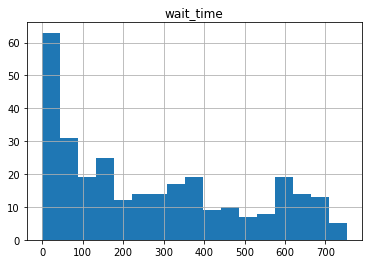

In [15]:
import math  
result_df.hist(column=['wait_time'], bins= int(math.sqrt(len(result_df.index))))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22cd045550>]],
      dtype=object)

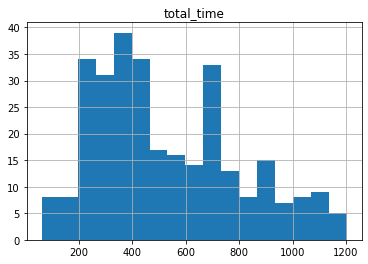

In [16]:
result_df.hist(column=['total_time'], bins= int(math.sqrt(len(result_df.index))))

In [17]:
result_df['direction'] = result_df.apply(lambda row: row.destination > row.initial_floor, axis=1)
result_df = result_df.replace(True, 'UP')
result_df = result_df.replace(False, 'DOWN')

In [18]:
result_df['time'] = result_df.apply(lambda row: int(row.arrive/60) , axis=1)

TypeError: ("unsupported operand type(s) for /: 'str' and 'int'", 'occurred at index 30')

In [21]:
result_df[20:]

,arrive,boarding,attendance,selected_car,initial_floor,destination,wait_time,journey_time,total_time,direction
20,281,486,756,A,9,DOWN,205,270,475,DOWN
21,311,486,756,A,9,DOWN,175,270,445,DOWN
22,343,486,756,A,9,DOWN,143,270,413,DOWN
23,386,486,756,A,9,DOWN,100,270,370,DOWN
24,36,516,756,A,8,DOWN,480,240,720,DOWN
25,198,516,756,A,8,DOWN,318,240,558,DOWN
26,268,516,756,A,8,DOWN,248,240,488,DOWN
27,369,516,756,A,8,DOWN,147,240,387,DOWN
28,438,516,756,A,8,DOWN,78,240,318,DOWN
29,464,516,756,A,8,DOWN,52,240,292,DOWN


In [ ]:
result_df.groupby(['time', 'direction'])['arrive'].count()

In [ ]:
all_df = make_analyzes(all_passengers)

In [ ]:
all_df